# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]
                prediction = self.predict(inputs)

                error = Y_train[i] - prediction
                train_error_acum += error ** 2

                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()


In [3]:
N_samples = 5000 
N_inputs = 2  
train_size = 0.7  
N_validation = int((1 - train_size) * N_samples)

X_data = np.random.randint(2, size=(N_samples, N_inputs))
Y_data = np.logical_and(X_data[:, 0], X_data[:, 1]).astype(int)

X_train = X_data[:N_samples - N_validation]
Y_train = Y_data[:N_samples - N_validation]

X_validation = X_data[N_samples - N_validation:]
Y_validation = Y_data[N_samples - N_validation:]

print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]]
Y_data (first 5 samples):
[0 0 0 0 1]


In [4]:
perceptron_and = Perceptron(input_size=N_inputs)

In [5]:
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

predictions = []

for i in range(len(X_validation)):
    prob = perceptron_and.predict(X_validation[i])
    predictions.append((prob > th).astype('int'))

conf_matrix = confusion_matrix(Y_validation, predictions)

print("Matriz de Confusión:")
print(conf_matrix)

Input: [1 1]
Probabilidad: [0.86109049]
Prediction: [1]
Matriz de Confusión:
[[   0 1125]
 [   0  375]]


epoch: 0 | train error: [0.02387586] | val error: [0.00286431]
epoch: 10 | train error: [2.97713962e-05] | val error: [2.67786224e-05]
epoch: 20 | train error: [7.75992848e-06] | val error: [7.34368511e-06]
epoch: 30 | train error: [3.49498247e-06] | val error: [3.36713931e-06]
epoch: 40 | train error: [1.97852758e-06] | val error: [1.92357537e-06]
epoch: 50 | train error: [1.27096452e-06] | val error: [1.24248748e-06]
epoch: 60 | train error: [8.84739792e-07] | val error: [8.6811364e-07]
epoch: 70 | train error: [6.51103593e-07] | val error: [6.40559441e-07]
epoch: 80 | train error: [4.9911484e-07] | val error: [4.92008966e-07]
epoch: 90 | train error: [3.94732483e-07] | val error: [3.89715676e-07]


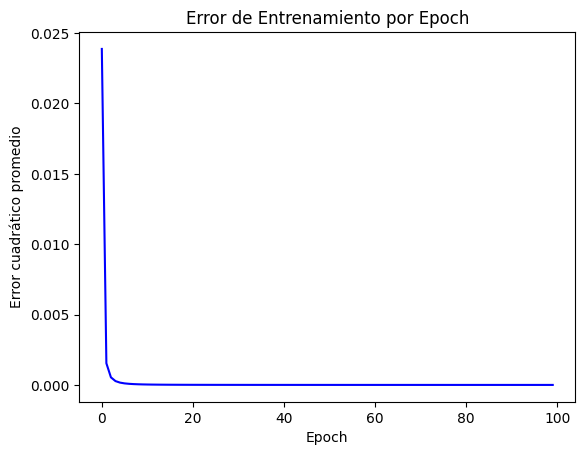

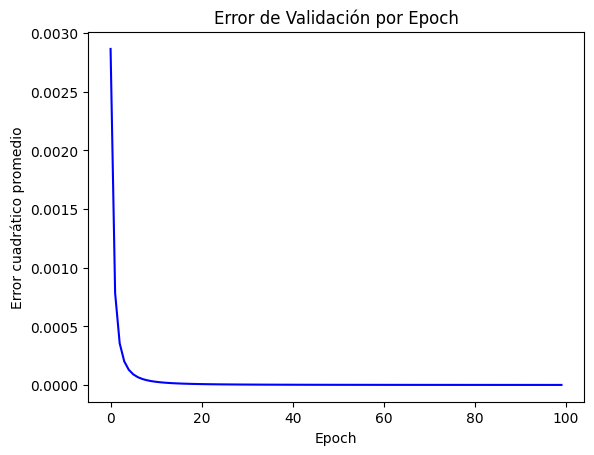

In [6]:
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

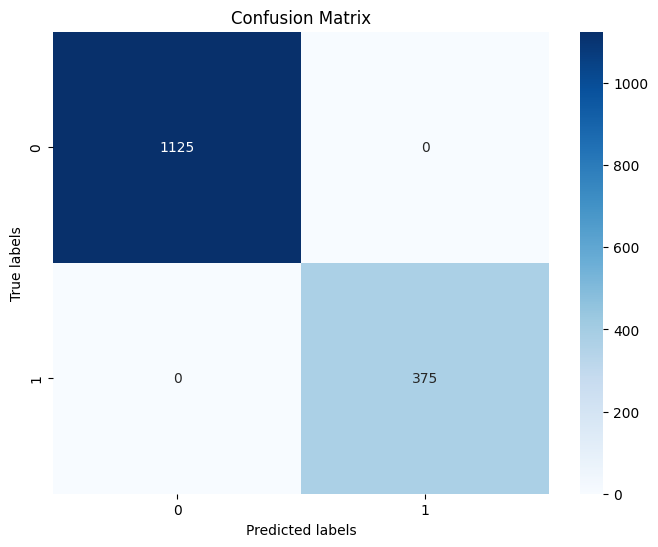

In [7]:
import seaborn as sns

predictions = perceptron_and.predict(X_validation)
predictions_rounded = np.round(predictions)

conf_matrix = confusion_matrix(Y_validation, predictions_rounded)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
